In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Retina display
%config InlineBackend.figure_format = 'retina'


In [2]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

In [3]:
c1 = torch.distributions.Normal(80, 10)
c2 = torch.distributions.Normal(70, 10)
c3 = torch.distributions.Normal(90, 5)

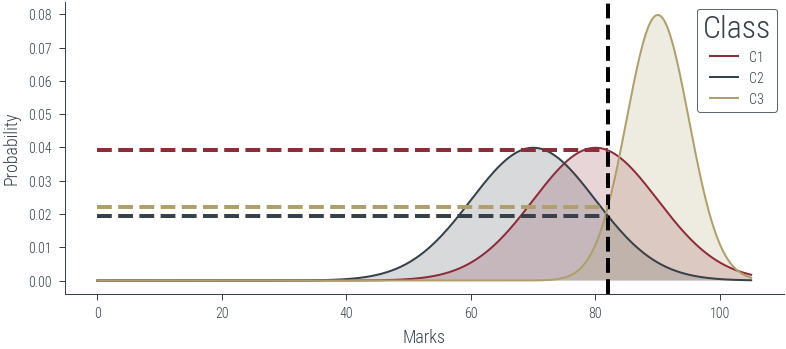

In [4]:
# Plot the distributions
x = torch.linspace(0, 105, 1000)
plt.plot(x, c1.log_prob(x).exp(), label='C1')
plt.plot(x, c2.log_prob(x).exp(), label='C2')
plt.plot(x, c3.log_prob(x).exp(), label='C3')
# Fill the area under the curve
plt.fill_between(x, c1.log_prob(x).exp(), alpha=0.2)
plt.fill_between(x, c2.log_prob(x).exp(), alpha=0.2)
plt.fill_between(x, c3.log_prob(x).exp(), alpha=0.2)

plt.xlabel('Marks')
plt.ylabel('Probability')

plt.legend(title='Class')
plt.savefig('../figures/mle/mle-example.pdf', bbox_inches='tight')

# Vertical line at x = 85
marks = torch.tensor([82.])
plt.axvline(marks.item(), color='k', linestyle='--', lw=2)
# Draw horizontal line to show the probability at x = 85
plt.hlines(c1.log_prob(marks).exp(), 0, marks.item(), color='C0', linestyle='--', lw=2)
plt.hlines(c2.log_prob(marks).exp(), 0, marks.item(), color='C1', linestyle='--', lw=2)
plt.hlines(c3.log_prob(marks).exp(), 0, marks.item(), color='C2', linestyle='--', lw=2)
plt.savefig('../figures/mle/mle-example-2.pdf', bbox_inches='tight')


Text(0, 0.5, 'Likelihood $p(x = 20|\\mu$)')

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


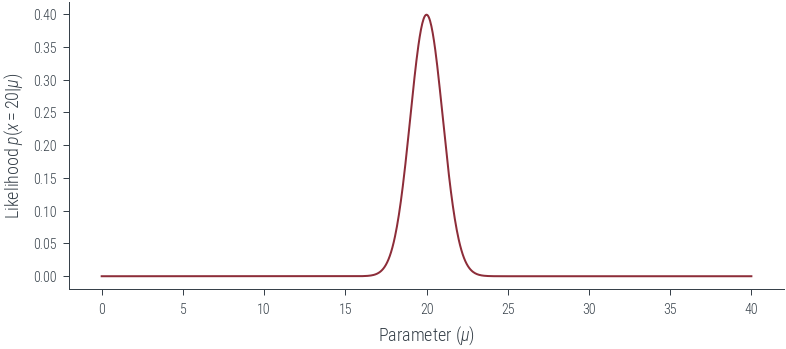

In [5]:
obs = torch.tensor([20.0])
sigma = torch.tensor([1.0])

# Plot the likelihood
mus = torch.linspace(0, 40, 1000)
plt.plot(mus, torch.distributions.Normal(mus, sigma).log_prob(obs).exp())
plt.xlabel(r'Parameter ($\mu$)')
plt.ylabel(r'Likelihood $p(x = 20|\mu$)')

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [54]:
# Interactive plot showing fitting normal distribution of varying mu to one data point

def plot_norm(mu):
    mu = torch.tensor(mu)
    sigma = torch.tensor(1.0)
    x = torch.tensor(20.0)
    n = torch.distributions.Normal(mu, sigma)
    x_lin = torch.linspace(0, 40, 500)
    y_lin = n.log_prob(x_lin).exp()
    likelihood = n.log_prob(x).exp()
    plt.plot(x_lin, y_lin, label=rf"$\mathcal{{N}}({mu.item():0.4f}, 1)$")
    plt.legend()
    plt.title(f"Likelihood={likelihood:.4f}")
    plt.ylim(0, 0.5)
    plt.fill_between(x_lin, y_lin, alpha=0.2)
    plt.axvline(x=x, color="black", linestyle="--")
    plt.axhline(y=likelihood, color="black", linestyle="--")
        
#plot_norm(20)
interact(plot_norm, mu=(0, 30, 0.1))


interactive(children=(FloatSlider(value=15.0, description='mu', max=30.0), Output()), _dom_classes=('widget-in…

<function __main__.plot_norm(mu)>

In [68]:
# Interactive plot showing fitting normal distribution of varying mu to one data point

def plot_norm_log(mu):
    mu = torch.tensor(mu)
    sigma = torch.tensor(1.0)
    x = torch.tensor(20.0)
    n = torch.distributions.Normal(mu, sigma)
    x_lin = torch.linspace(0, 40, 500)
    fig, ax = plt.subplots(nrows=2, sharex=True)
    y_log_lin = n.log_prob(x_lin)
    y_lin = y_log_lin.exp()
    ll = n.log_prob(x)
    likelihood = ll.exp()
    ax[0].plot(x_lin, y_lin, label=rf"$\mathcal{{N}}({mu.item():0.4f}, 1)$")
    #plt.legend()
    ax[0].set_title(f"Likelihood={likelihood:.4f}")
    ax[0].set_ylim(0, 0.5)
    ax[0].fill_between(x_lin, y_lin, alpha=0.2)

    ax[1].plot(x_lin, y_log_lin, label=rf"$\mathcal{{N}}({mu.item():0.4f}, 1)$")
    ax[1].set_title(f"Log Likelihood={ll:.4f}")
    ax[1].set_ylim(-500, 20)
    
    ax[0].axvline(x=x, color="black", linestyle="--")
    ax[0].axhline(y=likelihood, color="black", linestyle="--")

    ax[1].axvline(x=x, color="black", linestyle="--")
    ax[1].axhline(y=ll, color="black", linestyle="--")
        
#plot_norm_log(10)
interact(plot_norm_log, mu=(0, 30, 0.1))


interactive(children=(FloatSlider(value=15.0, description='mu', max=30.0), Output()), _dom_classes=('widget-in…

<function __main__.plot_norm_log(mu)>

In [55]:
#
s1 = torch.tensor([82.0])
s2 = torch.tensor([72.0])

p_s1_c1 = c1.log_prob(s1).exp()
p_s1_c2 = c2.log_prob(s1).exp()
p_s1_c3 = c3.log_prob(s1).exp()

p_s2_c1 = c1.log_prob(s2).exp()
p_s2_c2 = c2.log_prob(s2).exp()
p_s2_c3 = c3.log_prob(s2).exp()

# Create dataframe
df = pd.DataFrame({
    'Class': ['C1', 'C2', 'C3'],
    'Student 1 (82)': [p_s1_c1.item(), p_s1_c2.item(), p_s1_c3.item()],
    'Student 2 (72)': [p_s2_c1.item(), p_s2_c2.item(), p_s2_c3.item()]
})

df = df.set_index('Class')
df

,Student 1 (82),Student 2 (72)
Class,,
C1,0.039104,0.028969
C2,0.019419,0.039104
C3,0.022184,0.000122


<AxesSubplot:xlabel='Class'>

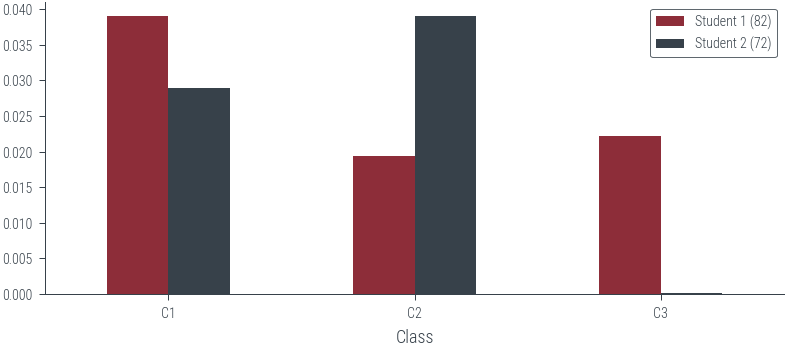

In [7]:
df.plot(kind='bar', rot=0)

In [8]:
# Multiply the probabilities
df.aggregate('prod', axis=1).to_latex()


/tmp/ipykernel_3101428/1744789372.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.aggregate('prod', axis=1).to_latex()


'\\begin{tabular}{lr}\n\\toprule\n{} &         0 \\\\\nClass &           \\\\\n\\midrule\nC1    &  0.001133 \\\\\nC2    &  0.000759 \\\\\nC3    &  0.000003 \\\\\n\\bottomrule\n\\end{tabular}\n'

<AxesSubplot:xlabel='Class'>

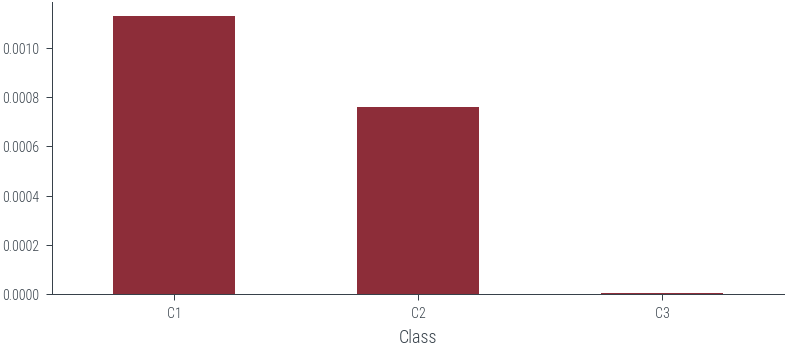

In [9]:
df.aggregate('prod', axis=1).plot(kind='bar', rot=0)

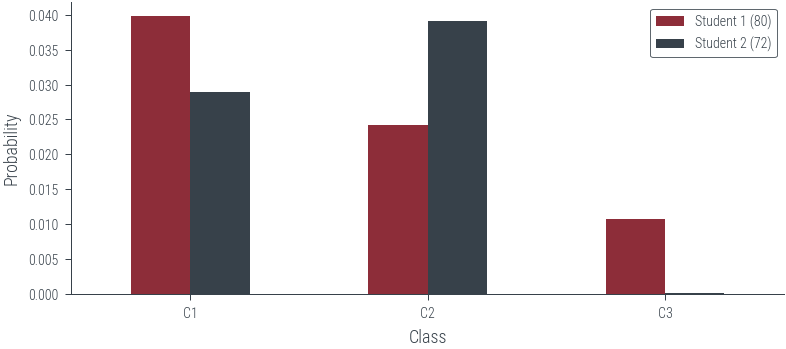

In [11]:
# Create a slider to change s1 and s2 marks and plot the likelihood


def plot_likelihood(s1, s2, scale='log'):
    s1 = torch.tensor([s1])
    s2 = torch.tensor([s2])
    p_s1_c1 = c1.log_prob(s1)
    p_s1_c2 = c2.log_prob(s1)
    p_s1_c3 = c3.log_prob(s1)

    p_s2_c1 = c1.log_prob(s2)
    p_s2_c2 = c2.log_prob(s2)
    p_s2_c3 = c3.log_prob(s2)


    # Create dataframe
    df = pd.DataFrame({
        'Class': ['C1', 'C2', 'C3'],
        f'Student 1 ({s1.item()})': [p_s1_c1.item(), p_s1_c2.item(), p_s1_c3.item()],
        f'Student 2 ({s2.item()})': [p_s2_c1.item(), p_s2_c2.item(), p_s2_c3.item()]
    })
    
    

    df = df.set_index('Class')
    if scale!='log':
        df  = df.apply(np.exp)
    df.plot(kind='bar', rot=0)
    plt.ylabel('Probability')
    plt.xlabel('Class')

    if scale=='log':
        plt.ylabel('Log Probability')
        #plt.yscale('log')

plot_likelihood(80, 72, scale='linear')

    

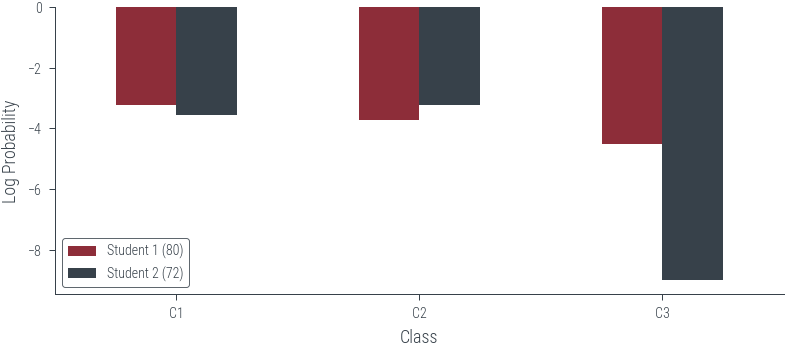

In [12]:
plot_likelihood(80, 72, scale='log')


In [13]:
# Interactive plot
interact(plot_likelihood, s1=(0, 100), s2=(0, 100), scale=['linear', 'log'])

interactive(children=(IntSlider(value=50, description='s1'), IntSlider(value=50, description='s2'), Dropdown(d…

<function __main__.plot_likelihood(s1, s2, scale='log')>